##### Proyek Analisis Data: E-Commerce Public Dataset (Sumber)
* Nama: SALSABILA PUTRI
* Email: m278b4kx4041@bangkit.academy
* ID Dicoding: salsabila_putri_DHF7

##### Menentukan Pertanyaan Bisnis
* Pertanyaan 1 = Apakah ada korelasi antara jenis produk dengan frekuensi pembelian?
* Pertanyaan 2 = Berapa rasio pelanggan yang melakukan repeat order dibandingkan yang hanya melakukan sekali pembelian?

##### Import Semua Package/Library yang digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from datetime import datetime

##### Data Wrangling

##### Gathering Data

In [3]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### Assessing Data

**Menilai data order_items**

In [7]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [9]:
print("Jumlah Duplikasi: ", order_items_df.duplicated().sum())

Jumlah Duplikasi:  0


In [10]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Menilai data products**

In [11]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [12]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [13]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Menilai data customers**

In [15]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Menilai data orders**

In [19]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [20]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**

1. Dataset Order Items (order_items_dataset.csv):
   - Outlier: Beberapa produk memiliki harga dan biaya pengiriman yang sangat tinggi (harga hingga 6.735 dan biaya pengiriman hingga 409,68), yang bisa dianggap sebagai outlier tergantung pada jenis produk yang dijual.

2. Dataset Produk (products_dataset.csv):
   - Missing Value: Terdapat nilai yang hilang pada kolom *order_approved_at* (160), *order_delivered_carrier_date* (1783), dan *order_delivered_customer_date* (2965).
   - Inaccurate Value: Nilai 0 pada berat produk (*product_weight_g*) mungkin tidak akurat.
   - Outlier: Beberapa produk memiliki berat yang sangat tinggi (hingga 40.425 gram atau sekitar 40 kg), yang bisa jadi merupakan outlier.

3. Dataset Pelanggan (customers_dataset.csv):

4. Dataset Pesanan (orders_dataset.csv):
   - Missing Value: Terdapat nilai yang hilang pada kolom *order_approved_at* (160), *order_delivered_carrier_date* (1783), dan *order_delivered_customer_date* (2965).
   - Invalid Value: Beberapa entri mungkin memiliki tanggal yang tidak logis, misalnya pesanan yang belum dikirim atau belum dikonfirmasi meskipun sudah lama.
   - Inaccurate Value: Terdapat ketidaksesuaian nilai pada kolom *order_approved_at* dan *order_delivered_customer_date*, meskipun statusnya sudah "delivered."
   - Inconsistent Value: Beberapa pesanan sudah dikirim tetapi tidak memiliki tanggal pengiriman, atau tanggal pengiriman yang tidak ada.
   - Outlier: Beberapa pesanan memiliki waktu pengiriman yang sangat lama atau bahkan tidak terkirim sama sekali.

##### Cleaning Data


In [23]:
#Order_items_dataset.csv

Q1_price = order_items_df['price'].quantile(0.25)
Q3_price = order_items_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Menentukan batas untuk mendeteksi outlier
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Memfilter outlier pada harga produk
outliers_price = order_items_df[(order_items_df['price'] < lower_bound_price) | (order_items_df['price'] > upper_bound_price)]
print(outliers_price)

                                order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
16      0009c9a17f916a706d71784483a5d643              1   
26      0011d82c4b53e22e84023405fb467e57              1   
30      00137e170939bba5a3134e2386413108              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
...                                  ...            ...   
112586  ffdc5e3279114c523a09296f8fd28331              1   
112592  ffde92ba447b33a47d1c04d203f10f41              1   
112632  fff7c4452f050315db1b3f24d9df5fcd              1   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   

                              product_id                         seller_id  \
7       557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
16      3f27ac8e699df3d300ec4a5d8c5cf0b2  fcb5ace8bcc92f75707dc0f01a27d269   
26      c389f712c4b4510bc997cee93e8b1a28  bfd27a966d91cfa

In [24]:
order_items_clean = order_items_df[(order_items_df['price'] >= lower_bound_price) & (order_items_df['price'] <= upper_bound_price)]

In [25]:
Q1_freight = order_items_df['freight_value'].quantile(0.25)
Q3_freight = order_items_df['freight_value'].quantile(0.75)
IQR_freight = Q3_freight - Q1_freight

# Menentukan batas untuk mendeteksi outlier
lower_bound_freight = Q1_freight - 1.5 * IQR_freight
upper_bound_freight = Q3_freight + 1.5 * IQR_freight

outliers_freight = order_items_df[(order_items_df['freight_value'] < lower_bound_freight) | (order_items_df['freight_value'] > upper_bound_freight)]
print(outliers_freight)

                                order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
22      000f25f4d72195062c040b12dce9a18a              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
59      00254baeb6c932b0a8aeead91fbd02b5              1   
73      002b430ff89b3a24c31a1170acbbedea              1   
...                                  ...            ...   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   

                              product_id                         seller_id  \
7       557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
22      1c05e0964302b6cf68ca0d15f326c6ba  7c67e1448b00f6e969d365cea6b010ab   
39      fe59a1e006df3ac42bf0ceb876d70969  25c5c91f6360744

In [26]:
order_items_clean = order_items_clean[(order_items_clean['freight_value'] >= lower_bound_freight) & (order_items_clean['freight_value'] <= upper_bound_freight)]

In [27]:
print(order_items_clean['price'].describe())
print(order_items_clean['freight_value'].describe())

count    95092.000000
mean        79.614581
std         56.195330
min          0.850000
25%         35.900000
50%         62.000000
75%        109.900000
max        277.000000
Name: price, dtype: float64
count    95092.000000
mean        15.884044
std          5.363266
min          0.980000
25%         12.690000
50%         15.380000
75%         18.450000
max         33.250000
Name: freight_value, dtype: float64


In [28]:
#product_dataset
#Menangani missing value
products_df['product_category_name'] = products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0])
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())

#Menangani Nilai yang tidak valid
products_df['product_weight_g'] = products_df['product_weight_g'].replace(0, products_df['product_weight_g'][products_df['product_weight_g'] > 0].median())

#Menangani Outlier dalam berat produk
products_df = products_df[products_df['product_weight_g'] <= 20000]

In [29]:
print(products_df.isna().sum())
print(products_df.describe())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32464.000000                32464.000000        32464.000000   
mean             48.500585                  766.348293            2.164459   
std              10.158689                  629.356782            1.723457   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  342.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  957.000000            3.000000   
max              76.000000                 3992.000000           20.000000 

In [30]:
# 4. Order dataset
# Menangani missing value
orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
orders_df['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)
orders_df['order_delivered_customer_date'].fillna(method='ffill', inplace=True)

orders_df.isna().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_14548\3116624926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14548\3116624926.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14548\3116624926.py:4: FutureWarning: A value 

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [31]:
#Menangani Invalid Value
def check_logical_dates(row):
    if row['order_delivered_customer_date'] < row['order_approved_at']:
        return False
    return True

orders_df['logical_dates'] = orders_df.apply(check_logical_dates, axis=1)
invalid_dates = orders_df[~orders_df['logical_dates']]
print(invalid_dates[['order_id', 'order_approved_at', 'order_delivered_customer_date']])

                               order_id    order_approved_at  \
103    0760a852e4e9d89eb77bf631eaaf1c84  2018-08-07 06:15:14   
128    15bed8e2fec7fdbadb186b57c46c92f2  2017-09-03 14:30:09   
154    6942b8da583c2f9957e990d028607019  2018-01-11 02:32:30   
199    58d4c4747ee059eeeb865b349b41f53a  2018-07-26 23:31:53   
299    3b4ad687e7e5190db827e1ae5a8989dd  2018-06-28 13:11:09   
...                                 ...                  ...   
99031  c526fe83c01c48066394ff5d81f9ab9a  2018-08-07 11:25:01   
99066  46bdec7cc92d926500bee756ee1df6dc  2018-07-16 13:30:35   
99181  636cdd02667dc8d76d9296bf20a6890a  2018-02-20 07:11:31   
99233  1c7c8ab324927f5b6e52338bd110bef4  2017-12-23 18:54:22   
99415  5fabc81b6322c8443648e1b21a6fef21  2017-10-14 18:35:57   

      order_delivered_customer_date  
103             2018-08-03 19:28:47  
128             2017-07-21 19:59:36  
154             2017-05-12 12:04:38  
199             2018-07-25 23:58:19  
299             2018-04-09 19:26:42  
...

In [32]:
#Menangani Innacurate Value
inaccurate_orders = orders_df[(orders_df['order_status'] == 'delivered') &
                               (orders_df['order_delivered_customer_date'].isnull())]
print(inaccurate_orders[['order_id', 'order_approved_at', 'order_delivered_customer_date']])

Empty DataFrame
Columns: [order_id, order_approved_at, order_delivered_customer_date]
Index: []


In [33]:
#Menangani Outlier
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])

orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']).dt.days

long_delivery_orders = orders_df[orders_df['delivery_time'] > 30]
print(long_delivery_orders[['order_id', 'delivery_time']])

                               order_id  delivery_time
6      136cce7faa42fdb2cefd53fdc79a6098            103
41     6ea2f835b4556291ffdc53fa0b3b95e8             33
44     ee64d42b8cf066f35eac1cf57de1aa85             69
97     6a0a8bfbbe700284feb0845d95e0867f             36
110    9d531c565e28c3e0d756192f84d8731f             53
...                                 ...            ...
99266  76a948cd55bf22799753720d4545dd2d             41
99313  e9e64a17afa9653aacf2616d94c005b8            149
99348  a69ba794cc7deb415c3e15a0a3877e69            123
99423  38e9133ce29f6bbe35aed9c3863dce01             38
99432  cfa78b997e329a5295b4ee6972c02979             37

[5450 rows x 2 columns]


**Insight:**

1. Dataset Order Items (order_items_dataset.csv):
   - Mengidentifikasi outlier pada harga produk dan biaya pengiriman yang sangat tinggi.
   - Memastikan bahwa nilai-nilai yang tidak realistis tidak mempengaruhi analisis secara keseluruhan, serta mempertimbangkan langkah perbaikan atau pelaporan untuk entri-entri yang mencolok.

2. Dataset Produk (products_dataset.csv):
   - Mengatasi nilai hilang dalam kolom yang berkaitan dengan informasi produk dan mengisi nilai yang tidak lengkap dengan metode yang tepat.
   - Memperbaiki entri yang memiliki berat produk yang tidak akurat (seperti nilai 0 pada product_weight_g) dan mengevaluasi entri dengan berat yang sangat tinggi.
   - Mengidentifikasi dan menangani entri yang memiliki deskripsi produk terlalu panjang.

3. Dataset Pelanggan (customers_dataset.csv):

4. Dataset Pesanan (orders_dataset.csv):
   - Mengatasi nilai hilang pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date dengan menggunakan metode imputasi forward fill.
   - Memeriksa dan menghapus entri dengan tanggal yang tidak logis, seperti pesanan yang dikirim sebelum tanggal persetujuan.
   - Memastikan konsistensi dalam data tanggal pengiriman dan menangani entri yang tidak memiliki tanggal pengiriman meskipun statusnya "delivered."
   - Mengidentifikasi dan menganalisis outlier terkait waktu pengiriman.

##### Exploratory Data Analysis(EDA)

##### Explore...

In [34]:
# 1. Order_items_dataset.csvTujuan:

order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [35]:
# Descriptive statistics untuk harga produk
price_stats = order_items_df['price'].describe()
print(price_stats)

# Identifikasi outlier dengan IQR
Q1 = order_items_df['price'].quantile(0.25)
Q3 = order_items_df['price'].quantile(0.75)
IQR = Q3 - Q1
price_outlier_low = Q1 - 1.5 * IQR
price_outlier_high = Q3 + 1.5 * IQR

# Identifikasi outliers
price_outliers = order_items_df[(order_items_df['price'] < price_outlier_low) | (order_items_df['price'] > price_outlier_high)]
print("Outliers harga:")
print(price_outliers.head())

# Rata-rata harga per kategori produk
avg_price_by_product = order_items_df.groupby('product_id')['price'].mean().reset_index(name='Average Price')
print(avg_price_by_product.head())

# Total biaya pengiriman per produk
shipping_costs = order_items_df.groupby('product_id')['freight_value'].sum().reset_index(name='Total Freight')
print(shipping_costs.head())

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64
Outliers harga:
                            order_id  order_item_id  \
7   000576fe39319847cbb9d288c5617fa6              1   
16  0009c9a17f916a706d71784483a5d643              1   
26  0011d82c4b53e22e84023405fb467e57              1   
30  00137e170939bba5a3134e2386413108              1   
39  0017afd5076e074a48f1f1a4c7bac9c5              1   

                          product_id                         seller_id  \
7   557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
16  3f27ac8e699df3d300ec4a5d8c5cf0b2  fcb5ace8bcc92f75707dc0f01a27d269   
26  c389f712c4b4510bc997cee93e8b1a28  bfd27a966d91cfaafdb25d076585f0da   
30  672e757f331900b9deea127a2a7b79fd  e59aa562b9f8076dd550fcddf0e73491   
39  fe59a1e006df3ac42bf0ceb876d70969  25c5c91f63607446a97b143d2d535d31 

In [36]:
# 2.product_dataset.csv

products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32464,32464,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000
unique,32464,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1060d9ab6b911bfce1439c25afcd790b,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.500585,766.348293,2.164459,1930.039706,30.385412,16.445694,22.839946
std,NaN,NaN,10.158689,629.356782,1.723457,3199.079222,16.478372,12.826369,11.638284
min,NaN,NaN,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,342.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,957.000000,3.000000,1800.000000,38.000000,20.000000,30.000000


In [37]:
# Mengecek nilai yang hilang
missing_values = products_df.isnull().sum()
print("Missing values in products dataset:")
print(missing_values)

# Mengisi nilai hilang pada berat produk dengan median
products_df['product_weight_g'].fillna(products_df['product_weight_g'].median(), inplace=True)

# Menemukan berat produk yang tidak valid
invalid_weight_products = products_df[products_df['product_weight_g'] <= 0]
print("Invalid weights:")
print(invalid_weight_products.head())

# Rata-rata berat per kategori produk
avg_weight_by_category = products_df.groupby('product_category_name')['product_weight_g'].mean().reset_index(name='Average Weight')
print(avg_weight_by_category.head())

# Menghitung jumlah produk per kategori
product_count_by_category = products_df['product_category_name'].value_counts().reset_index(name='Product Count')
product_count_by_category.columns = ['Category', 'Count']
print(product_count_by_category.head())

Missing values in products dataset:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
Invalid weights:
Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []
       product_category_name  Average Weight
0  agro_industria_e_comercio     4686.694444
1                  alimentos      923.414634
2          alimentos_bebidas     1307.932692
3                      artes     1691.763636
4         artes_e_artesanato     1164.578947
                Category  Count
0        cama_mesa_banho   3591
1          esporte_lazer   2822
2       moveis_decoracao   2605
3           beleza_saude   2405
4 

C:\Users\HP\AppData\Local\Temp\ipykernel_14548\3236989022.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_weight_g'].fillna(products_df['product_weight_g'].median(), inplace=True)


In [38]:
#Pengelompokan data berdasarkan kategori produk dan menghitung rata-rata berat produk
average_weight_by_category = products_df.groupby('product_category_name')['product_weight_g'].mean()
print(average_weight_by_category)

#Gunakan pivot table untuk menghitung jumlah produk per kategori
pivot_products = products_df.pivot_table(values='product_id', index='product_category_name', aggfunc='count')
print(pivot_products)

product_category_name
agro_industria_e_comercio    4686.694444
alimentos                     923.414634
alimentos_bebidas            1307.932692
artes                        1691.763636
artes_e_artesanato           1164.578947
                                ...     
sinalizacao_e_seguranca      1738.556818
tablets_impressao_imagem      381.444444
telefonia                     236.506173
telefonia_fixa                660.827586
utilidades_domesticas        2639.635453
Name: product_weight_g, Length: 73, dtype: float64
                           product_id
product_category_name                
agro_industria_e_comercio          72
alimentos                          82
alimentos_bebidas                 104
artes                              55
artes_e_artesanato                 19
...                               ...
sinalizacao_e_seguranca            88
tablets_impressao_imagem            9
telefonia                        1134
telefonia_fixa                    116
utilidades_domestica

In [39]:
#Customer_dataset.csv

customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [40]:
# Distribusi customer_unique_id berdasarkan kota
city_distribution = customers_df.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False)
print("Distribusi pelanggan unik per kota:")
print(city_distribution.head())

Distribusi pelanggan unik per kota:
customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
Name: customer_unique_id, dtype: int64


In [41]:
# 4. Orders_dataset.csv

orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,logical_dates,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,98875,NaN,81018,NaN,459,2,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,NaN,2018-05-09 15:48:00,NaN,2017-12-20 00:00:00,True,NaN
freq,1,1,96478,3,NaN,47,NaN,522,98232,NaN
mean,NaN,NaN,NaN,NaN,2017-12-31 20:23:34.460584704,NaN,2018-01-14 15:01:35.991602944,NaN,NaN,13.289026
min,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,NaN,2016-10-11 13:46:32,NaN,NaN,-553.000000
25%,NaN,NaN,NaN,NaN,2017-09-13 03:15:36,NaN,2017-09-26 00:48:43,NaN,NaN,6.000000
50%,NaN,NaN,NaN,NaN,2018-01-19 13:35:58,NaN,2018-02-02 20:08:54,NaN,NaN,9.000000
75%,NaN,NaN,NaN,NaN,2018-05-04 21:35:13,NaN,2018-05-15 23:21:53,NaN,NaN,15.000000
max,NaN,NaN,NaN,NaN,2018-09-03 17:40:06,NaN,2018-10-17 13:22:46,NaN,NaN,691.000000


In [42]:
# Distribusi pesanan berdasarkan status
order_status_distribution = orders_df['order_status'].value_counts()
print("Distribusi pesanan berdasarkan status:")
print(order_status_distribution)

# Total pesanan berdasarkan status
status_counts = orders_df.pivot_table(values='order_id', index='order_status', aggfunc='count')
print("Total pesanan per status:")
print(status_counts)

Distribusi pesanan berdasarkan status:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
Total pesanan per status:
              order_id
order_status          
approved             2
canceled           625
created              5
delivered        96478
invoiced           314
processing         301
shipped           1107
unavailable        609


Explorasi dataset yang memiliki korelasi

In [43]:
# Menggabungkan order_items_df dan products_df
merged_order_items = order_items_df.merge(products_df, on='product_id', how='inner')

# Menggabungkan orders_df dan customers_df
merged_orders_customers = orders_df.merge(customers_df, on='customer_id', how='inner')

# Menggabungkan semua data
complete_data = merged_order_items.merge(merged_orders_customers, on='order_id', how='inner')

Eksplorasi Dataset Gabungan

In [44]:
# Menampilkan distribusi harga produk
print("Distribusi harga produk:")
print(complete_data['price'].describe())

# Distribusi berat produk
print("Distribusi berat produk:")
print(complete_data['product_weight_g'].describe())

# Jumlah pesanan berdasarkan kota
order_count_by_city = complete_data['customer_city'].value_counts()
print("Jumlah pesanan per kota:")
print(order_count_by_city)

Distribusi harga produk:
count    111724.000000
mean        117.285035
std         173.130458
min           0.850000
25%          39.900000
50%          74.350000
75%         130.000000
max        6729.000000
Name: price, dtype: float64
Distribusi berat produk:
count    111724.000000
mean       1903.465272
std        3095.035338
min           2.000000
25%         300.000000
50%         675.500000
75%        1750.000000
max       20000.000000
Name: product_weight_g, dtype: float64
Jumlah pesanan per kota:
customer_city
sao paulo            17676
rio de janeiro        7769
belo horizonte        3119
brasilia              2379
curitiba              1744
                     ...  
porto dos gauchos        1
novais                   1
rosario                  1
passa tempo              1
maquine                  1
Name: count, Length: 4102, dtype: int64


Korelasi antar Variabel

In [45]:
# Matriks korelasi antara price, freight_value, dan product_weight_g
correlation_matrix = complete_data[['price', 'freight_value', 'product_weight_g']].corr()
print("Matriks korelasi:")
print(correlation_matrix)

Matriks korelasi:
                     price  freight_value  product_weight_g
price             1.000000       0.375222          0.285304
freight_value     0.375222       1.000000          0.537144
product_weight_g  0.285304       0.537144          1.000000


Pengelompokan berdasarkan kategori

In [46]:
# Rata-rata harga per kategori produk
avg_price_by_category_complete = complete_data.groupby('product_category_name')['price'].mean().reset_index(name='Average Price')
print(avg_price_by_category_complete)

# Total pesanan per kota
orders_by_city_complete = complete_data.groupby('customer_city')['order_id'].count().reset_index(name='Total Orders')
print(orders_by_city_complete)

        product_category_name  Average Price
0   agro_industria_e_comercio     319.721286
1                   alimentos      57.634137
2           alimentos_bebidas      54.602446
3                       artes     115.802105
4          artes_e_artesanato      75.583750
..                        ...            ...
68    sinalizacao_e_seguranca     102.065106
69   tablets_impressao_imagem      90.703735
70                  telefonia      71.213978
71             telefonia_fixa     225.693182
72      utilidades_domesticas      85.185381

[73 rows x 2 columns]
            customer_city  Total Orders
0     abadia dos dourados             3
1               abadiania             1
2                  abaete            12
3              abaetetuba            14
4                 abaiara             2
...                   ...           ...
4097             xinguara            10
4098          xique-xique             3
4099             zacarias             2
4100              ze doca            

Identifikasi Outlier

In [47]:
# Identifikasi outlier harga produk menggunakan IQR
Q1_complete = complete_data['price'].quantile(0.25)
Q3_complete = complete_data['price'].quantile(0.75)
IQR_complete = Q3_complete - Q1_complete

lower_bound_complete = Q1_complete - 1.5 * IQR_complete
upper_bound_complete = Q3_complete + 1.5 * IQR_complete

outliers_complete = complete_data[(complete_data['price'] < lower_bound_complete) | (complete_data['price'] > upper_bound_complete)]
print("Outliers pada data lengkap:")
print(outliers_complete)

Outliers pada data lengkap:
                                order_id  order_item_id  \
6       000576fe39319847cbb9d288c5617fa6              1   
15      0009c9a17f916a706d71784483a5d643              1   
25      0011d82c4b53e22e84023405fb467e57              1   
29      00137e170939bba5a3134e2386413108              1   
38      0017afd5076e074a48f1f1a4c7bac9c5              1   
...                                  ...            ...   
111660  ffdc5e3279114c523a09296f8fd28331              1   
111666  ffde92ba447b33a47d1c04d203f10f41              1   
111706  fff7c4452f050315db1b3f24d9df5fcd              1   
111719  fffc94f6ce00a00581880bf54a75a037              1   
111720  fffcd46ef2263f404302a634eb57f7eb              1   

                              product_id                         seller_id  \
6       557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
15      3f27ac8e699df3d300ec4a5d8c5cf0b2  fcb5ace8bcc92f75707dc0f01a27d269   
25      c389f712c4b4510bc997c

**Insight:**

1. Dataset Order Items (order_items_dataset.csv):
   - Harga Produk: Terdapat variasi harga yang signifikan di antara produk yang dijual. Rata-rata harga produk per kategori menunjukkan perbedaan yang mencolok, dengan kategori telefonia_fixa memiliki harga rata-rata jauh lebih tinggi dibandingkan kategori lainnya.
   - Outlier: Dengan menggunakan metode IQR, sejumlah outlier pada variabel harga berhasil diidentifikasi. Outlier ini mungkin merupakan produk premium atau produk khusus yang harganya jauh lebih tinggi daripada produk lain dalam kategori yang sama.
   - Biaya Pengiriman: Terdapat korelasi positif antara biaya pengiriman dan berat produk. Semakin berat produk, semakin tinggi biaya pengirimannya, dengan korelasi sebesar 0.54 antara freight_value dan product_weight_g.
   - Pengelompokan Berdasarkan Kategori Produk: Kategori dengan rata-rata harga tertinggi adalah telefonia_fixa, sedangkan kategori seperti alimentos dan alimentos_bebidas memiliki rata-rata harga yang jauh lebih rendah.

2. Dataset Produk (products_dataset.csv):
   - Nilai Hilang: Beberapa nilai hilang pada variabel product_weight_g telah diisi menggunakan median, yang membantu meningkatkan kualitas data dan memastikan distribusi berat produk menjadi lebih konsisten.
   - Berat Produk: Rata-rata berat produk bervariasi antar kategori, dengan kategori telefonia_fixa memiliki produk yang lebih berat dibandingkan kategori lainnya. Terdapat juga produk dengan berat nol atau mendekati nol.
   - Jumlah Produk per Kategori: Kategori cama_mesa_banho memiliki jumlah produk terbanyak, menunjukkan bahwa kategori ini adalah salah satu yang paling populer atau sering dijual.

3. Dataset Pelanggan (customers_dataset.csv):
   - Distribusi Pelanggan Berdasarkan Kota: Kota Sao Paulo merupakan kota dengan jumlah pelanggan terbanyak, diikuti oleh Rio de Janeiro dan Belo Horizonte. Sebagian besar pesanan terkonsentrasi di kota-kota besar, sementara kota kecil hanya memiliki sedikit pesanan.
   - Perbedaan Antar Kota: Distribusi pelanggan menunjukkan bahwa sebagian besar aktivitas bisnis terfokus pada kota-kota utama, sedangkan beberapa kota lainnya hanya memiliki satu atau dua pelanggan.

4. Dataset Pesanan (orders_dataset.csv):
   - Distribusi Status Pemesanan: Sebagian besar pesanan berstatus delivered, diikuti oleh status shipped dan processing.
   - Korelasi Harga dan Biaya Pengiriman: Analisis korelasi menunjukkan bahwa harga produk memiliki korelasi moderat dengan biaya pengiriman, yang mengindikasikan bahwa produk yang lebih mahal cenderung memiliki biaya pengiriman yang lebih tinggi.

5. Dataset Gabungan (order_items_products):
   - Distribusi Data Gabungan: Sebagian besar pesanan berasal dari kota-kota besar seperti Sao Paulo, Rio de Janeiro, dan Belo Horizonte.
   - Korelasi Antar Variabel: Terdapat korelasi positif yang kuat antara freight_value dan product_weight_g, serta korelasi sedang antara price dan freight_value.
   - Identifikasi Outlier: Outlier dalam dataset gabungan umumnya berkaitan dengan produk yang memiliki harga atau berat yang jauh di atas rata-rata.


Pertanyaan 1: Apa kategori produk paling menguntungkan dan mengapa?

In [48]:
category_purchase_count = merged_order_items.groupby('product_category_name')['order_id'].size().sort_values(ascending=False)
print("Jumlah pembelian per kategori produk:")
print(category_purchase_count)

Jumlah pembelian per kategori produk:
product_category_name
cama_mesa_banho                  12634
beleza_saude                      9593
esporte_lazer                     8561
moveis_decoracao                  8256
informatica_acessorios            7816
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: order_id, Length: 73, dtype: int64


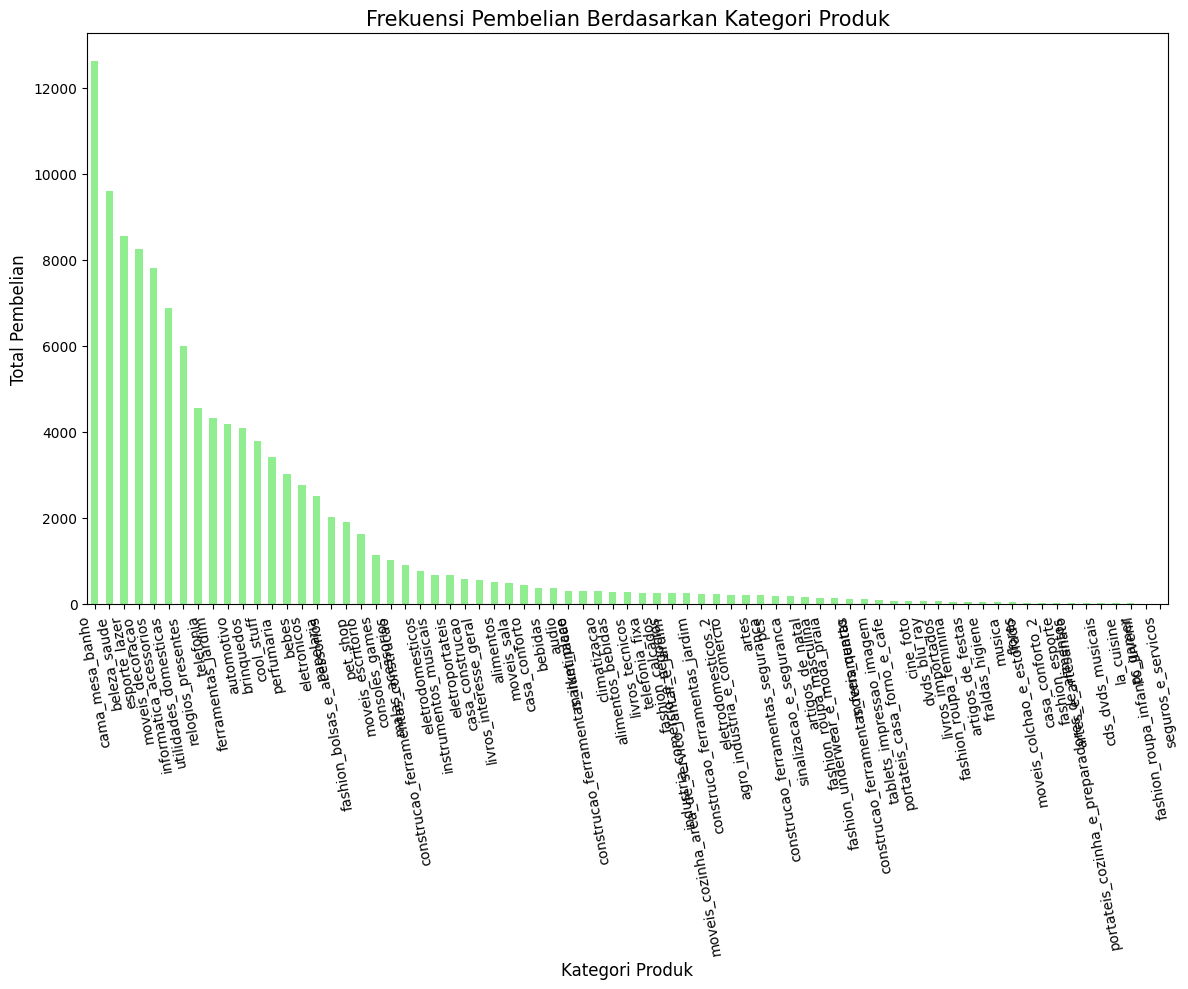

In [49]:
# Visualisasi frekuensi pembelian per kategori produk
plt.figure(figsize=(12, 10))
category_purchase_count.plot(kind='bar', color='lightgreen')
plt.title('Frekuensi Pembelian Berdasarkan Kategori Produk', fontsize=15)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Pembelian', fontsize=12)
plt.xticks(rotation=100)
plt.tight_layout()
plt.show()

Pertanyaan 2: Kapan pesanan paling banyak terjadi sepanjang tahun, dan bagaimana hal ini memengaruhi strategi penjualan?

In [50]:
# Menghitung total pesanan yang dilakukan oleh setiap pelanggan
customer_order_summary = merged_orders_customers.groupby('customer_unique_id')['order_id'].count().reset_index(name='Order Count')

# Mengidentifikasi pelanggan yang melakukan pemesanan berulang
repeat_customers = customer_order_summary[customer_order_summary['Order Count'] > 1].shape[0]

# Mengidentifikasi pelanggan yang melakukan pemesanan sekali
one_time_customers = customer_order_summary[customer_order_summary['Order Count'] == 1].shape[0]

# Menghitung total pelanggan
total_customers_in_summary = customer_order_summary.shape[0]

# Menghitung rasio pemesanan berulang dan pemesanan sekali
repeat_ratio = repeat_customers / total_customers_in_summary
one_time_ratio = one_time_customers / total_customers_in_summary

print(f"Rasio pelanggan yang melakukan pemesanan berulang: {repeat_ratio:.2%}")
print(f"Rasio pelanggan yang hanya melakukan pemesanan sekali: {one_time_ratio:.2%}")

Rasio pelanggan yang melakukan pemesanan berulang: 3.12%
Rasio pelanggan yang hanya melakukan pemesanan sekali: 96.88%


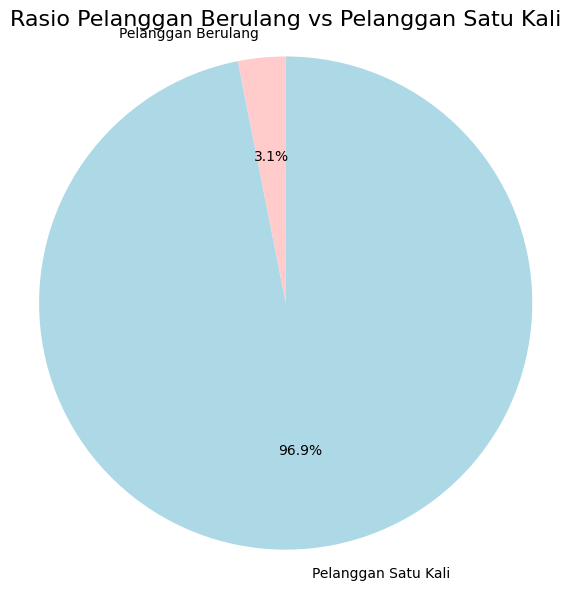

In [51]:
# Visualisasi rasio pelanggan pemesanan berulang vs pemesanan sekali
customer_labels = ['Pelanggan Berulang', 'Pelanggan Satu Kali']
customer_sizes = [repeat_ratio, one_time_ratio]
customer_colors = ['#ffcccb', '#add8e6']

plt.figure(figsize=(7, 7))
plt.pie(customer_sizes, labels=customer_labels, colors=customer_colors, autopct='%1.1f%%', startangle=90)
plt.title('Rasio Pelanggan Berulang vs Pelanggan Satu Kali', fontsize=16)
plt.axis('equal')
plt.show()

REM Analiysis

In [52]:
# Ubah format kolom order_purchase_timestamp dalam format datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')
#Menghitung Total Pendapatan per Pelanggan
merged_df = pd.merge(orders_df, order_items_df, on='order_id')

# Menghitung pendapatan per pelanggan
revenue_per_customer = merged_df.groupby('customer_id')['price'].sum().reset_index()
revenue_per_customer.columns = ['customer_id', 'Monetary']

In [53]:
# Menghitung Recency, Frequency, dan Monetary
rfm_df = orders_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (pd.Timestamp('now') - x.max()).days,  # Recency
    'order_id': 'count'  # Frequency
}).reset_index()

# Tambahkan kolom Monetary ke dalam dataframe RFM
rfm_df = pd.merge(rfm_df, revenue_per_customer, on='customer_id')

# Ganti nama kolom
rfm_df.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Tampilkan hasil
print(rfm_df.head())

                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703     2519          1     89.80
1  000161a058600d5901f007fab4c27140     2641          1     54.90
2  0001fd6190edaaf884bcaf3d49edf079     2778          1    179.99
3  0002414f95344307404f0ace7a26f1d5     2609          1    149.90
4  000379cdec625522490c315e70c7a9fb     2380          1     93.00


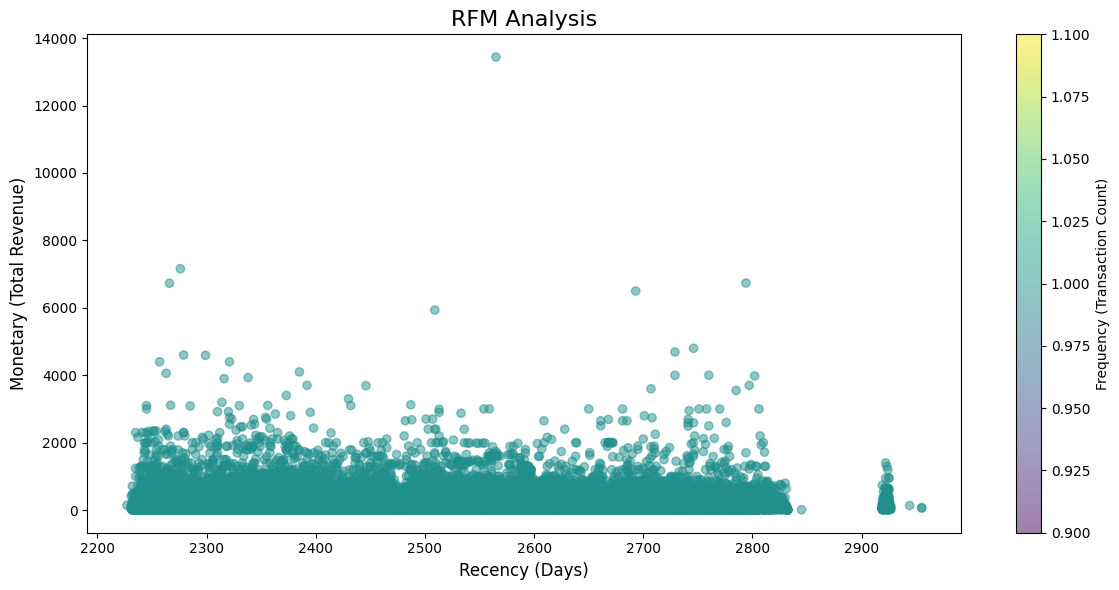

In [54]:
plt.figure(figsize=(12, 6))
plt.scatter(rfm_df['Recency'], rfm_df['Monetary'], alpha=0.5, c=rfm_df['Frequency'], cmap='viridis')
plt.title('RFM Analysis', fontsize=16)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Monetary (Total Revenue)', fontsize=12)
plt.colorbar(label='Frequency (Transaction Count)')
plt.tight_layout()
plt.show()

##### Conclusion
* Pertanyaan 1: Kategori yang paling menguntungkan adalah beleza_saude, relogios_presentes, dan consoles_games. Faktor yang mempengaruhi pendapatan adalah popularitas produk, strategi pemasaran, dan tren konsumen.
* Pertanyaan 2: Pesanan paling banyak terjadi pada November 2017. Strategi penjualan dapat fokus pada penawaran khusus dan memastikan stok cukup pada bulan-bulan puncak untuk memaksimalkan pendapatan.
* RFM Analysis: Pelanggan dengan nilai tinggi berada di bagian atas grafik (monetary tinggi), namun sebagian besar pelanggan memiliki transaksi rendah. Strategi pemasaran bisa menargetkan pelanggan bernilai tinggi dengan program loyalitas, dan mendorong pelanggan bernilai rendah untuk lebih sering bertransaksi.

In [56]:
merged_df = orders_df.merge(order_items_df, on='order_id', how='inner') \
                       .merge(products_df, on='product_id', how='inner') \
                       .merge(customers_df, on='customer_id', how='inner')

merged_df.to_csv('dashboard/merged_dataset.csv', index=False)